In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

In [2]:
#Loading data set
df = pd.read_csv("green.csv")  

In [3]:
years = range(2010, 2017)

In [4]:
years[0]

2010

In [8]:
print(df.head().to_csv(index=False))


Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.425,0.044,0.47,,4,2,1,4,1
111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.0,0.023,,3,2,1,1,1
111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.0,0.002,,4,2,1,4,1
111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.0,0.004,,3,2,1,4,1
113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.206,0.024,0.229,,4,2,1,4,1



In [10]:
#Data Preprocessing
df.columns

Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')

In [11]:
df.drop(columns=['Unnamed: 7'],inplace=True)

In [12]:
df.columns

Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          264 non-null    object 
 1   Commodity Name                                          264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          264 non-null    int64  
 8   DQ TemporalCorrelation of Factors withou

In [14]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,264.0,0.077795,0.239474,0.0,0.0,0.002,0.04325,2.914
Margins of Supply Chain Emission Factors,264.0,0.004057,0.022971,0.0,0.0,0.000,0.00000,0.321
Supply Chain Emission Factors with Margins,264.0,0.081871,0.243505,0.0,0.0,0.002,0.04350,2.914
DQ ReliabilityScore of Factors without Margins,264.0,3.416667,0.565708,2.0,3.0,3.000,4.00000,4.000
DQ TemporalCorrelation of Factors without Margins,264.0,2.000000,0.000000,2.0,2.0,2.000,2.00000,2.000
DQ GeographicalCorrelation of Factors without Margins,264.0,1.000000,0.000000,1.0,1.0,1.000,1.00000,1.000
DQ TechnologicalCorrelation of Factors without Margins,264.0,2.795455,1.250026,1.0,1.0,3.000,4.00000,5.000
DQ DataCollection of Factors without Margins,264.0,1.000000,0.000000,1.0,1.0,1.000,1.00000,1.000


In [15]:
df.isnull().sum()

Commodity Code                                            0
Commodity Name                                            0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
dtype: int64

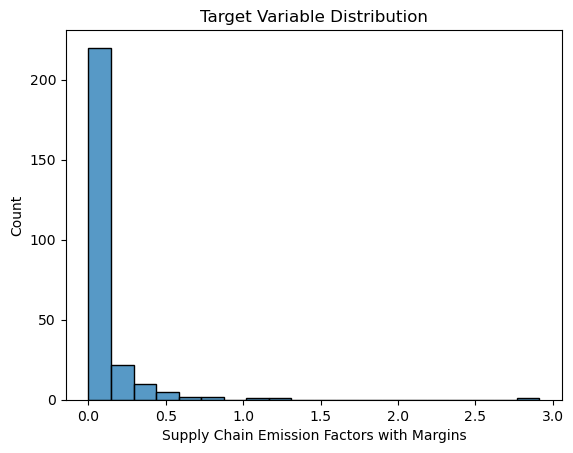

In [20]:
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=20)
plt.title('Target Variable Distribution')
plt.show()


In [21]:
print(df['Substance'].value_counts())

Substance
carbon dioxide    66
methane           66
nitrous oxide     66
other GHGs        66
Name: count, dtype: int64


In [22]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         198
kg CO2e/2018 USD, purchaser price     66
Name: count, dtype: int64


In [25]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [26]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [27]:
df['Substance']=df['Substance'].map(substance_map)

In [28]:
df['Substance'].unique()


array([0, 1, 2, 3], dtype=int64)

In [29]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [31]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [32]:
source_map={'Commodity':0, 'Industry':1}

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          264 non-null    object 
 1   Commodity Name                                          264 non-null    object 
 2   Substance                                               264 non-null    int64  
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          264 non-null    int64  
 8   DQ TemporalCorrelation of Factors withou

In [37]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

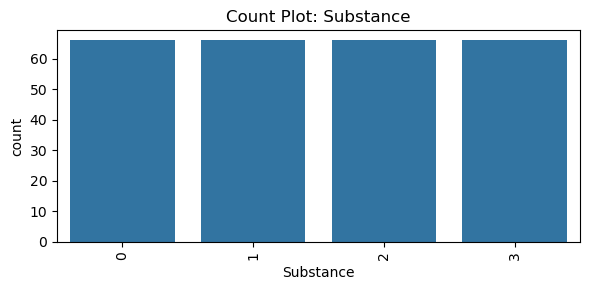

In [38]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

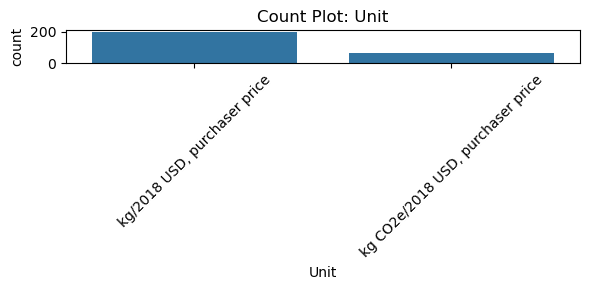

In [39]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
df.select_dtypes(include=np.number).corr()

,Substance,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
Substance,1.000000,-0.413313,-0.236509,-0.428831,0.390020,NaN,NaN,0.450769,NaN
Supply Chain Emission Factors without Margins,-0.413313,1.000000,0.128893,0.995610,-0.170015,NaN,NaN,0.018239,NaN
Margins of Supply Chain Emission Factors,-0.236509,0.128893,1.000000,0.221138,-0.075565,NaN,NaN,0.067013,NaN
Supply Chain Emission Factors with Margins,-0.428831,0.995610,0.221138,1.000000,-0.174331,NaN,NaN,0.024209,NaN
DQ ReliabilityScore of Factors without Margins,0.390020,-0.170015,-0.075565,-0.174331,1.000000,NaN,NaN,0.336057,NaN
DQ TemporalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.450769,0.018239,0.067013,0.024209,0.336057,NaN,NaN,1.000000,NaN
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          264 non-null    object 
 1   Commodity Name                                          264 non-null    object 
 2   Substance                                               264 non-null    int64  
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   DQ ReliabilityScore of Factors without Margins          264 non-null    int64  
 8   DQ TemporalCorrelation of Factors withou

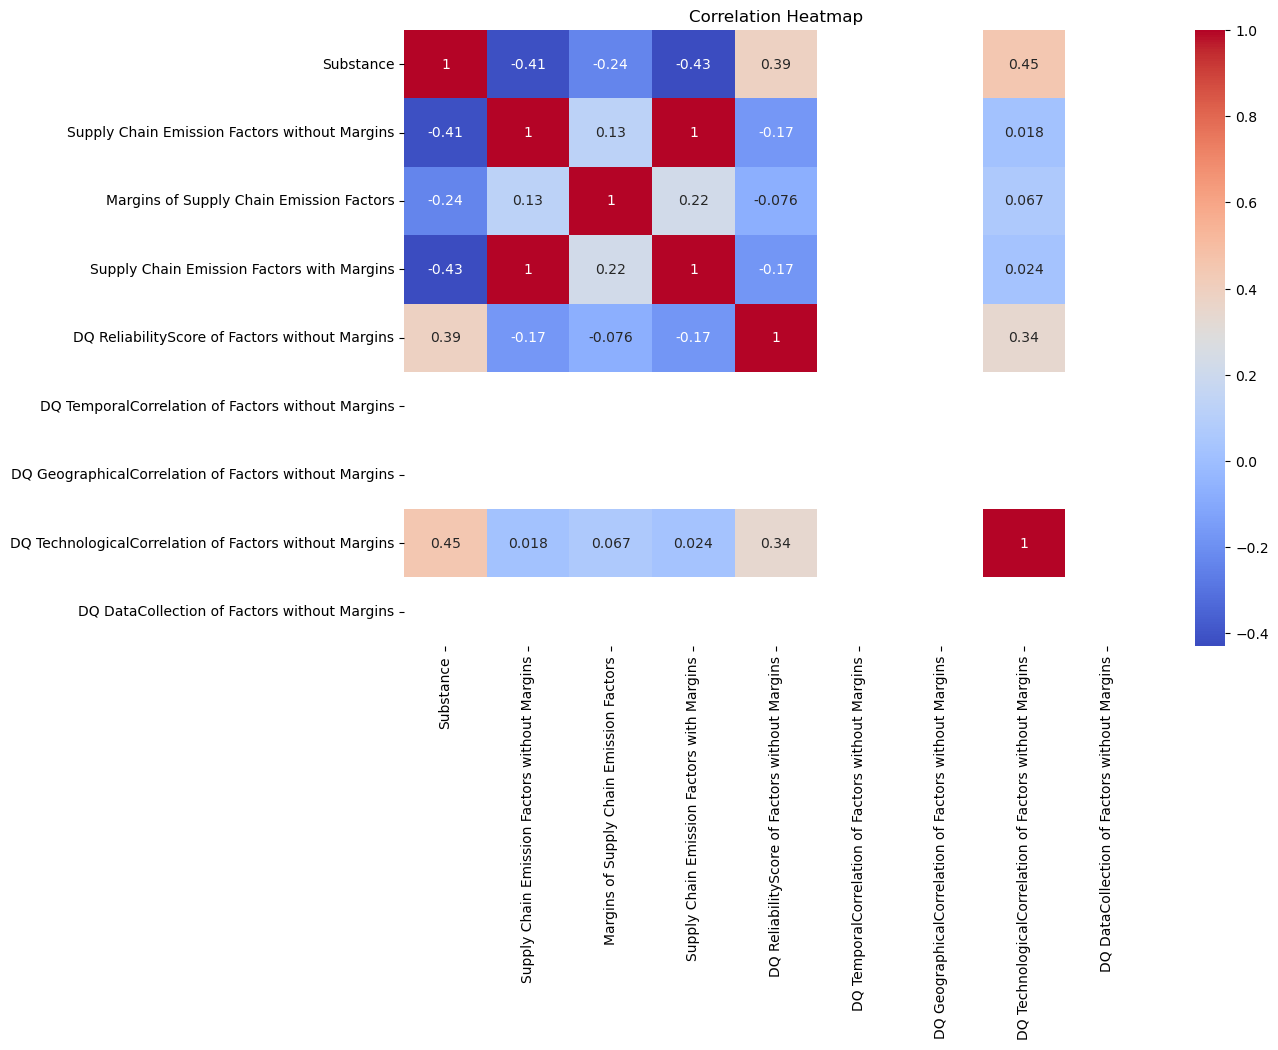

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [49]:
# Sanity checks
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Any NaN in X_train?", X_train.isnull().values.any())
print("Any NaN in y_train?", y_train.isnull().values.any())
print("y_train type:", y_train.dtype)


X_train shape: (211, 12)
y_train shape: (211,)
Any NaN in X_train? True
Any NaN in y_train? False
y_train type: float64


In [58]:
import pandas as pd

# Load your normalized CSV file (or original if this is before normalization)
df = pd.read_csv('green.csv')  # or use your actual file

# Check which columns are non-numeric
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

# Look inside them
for col in non_numeric_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Non-numeric columns: ['Commodity Code', 'Commodity Name', 'Substance', 'Unit']

Unique values in 'Commodity Code':
['111CA' '113FF' '211' '212' '213' '22' '23' '311FT' '313TT' '315AL' '321'
 '322' '323' '324' '325' '326' '327' '331' '332' '333' '334' '335'
 '3361MV' '3364OT' '337' '339' '42' '441' '445' '452' '481' '482' '483'
 '484' '485' '486' '487OS' '493' '4A0' '511' '512' '513' '514' '521CI'
 '523' '524' '525' '532RL' '5411' '5412OP' '5415' '55' '561' '562' '61'
 '621' '622' '623' '624' '711AS' '713' '721' '722' '81' 'HS' 'ORE']

Unique values in 'Commodity Name':
['Farms' 'Forestry, fishing, and related activities'
 'Oil and gas extraction' 'Mining, except oil and gas'
 'Support activities for mining' 'Utilities' 'Construction'
 'Food and beverage and tobacco products'
 'Textile mills and textile product mills'
 'Apparel and leather and allied products' 'Wood products'
 'Paper products' 'Printing and related support activities'
 'Petroleum and coal products' 'Chemical products'
 

In [59]:
model = RandomForestRegressor(random_state=42)

In [63]:

# Select numeric columns
features = df[[
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors',
    'DQ ReliabilityScore of Factors without Margins',
    'DQ TemporalCorrelation of Factors without Margins',
    'DQ GeographicalCorrelation of Factors without Margins',
    'DQ TechnologicalCorrelation of Factors without Margins',
    'DQ DataCollection of Factors without Margins',
    'Supply Chain Emission Factors with Margins'
]].dropna()

# X and y split
X = features.drop(columns=['Supply Chain Emission Factors with Margins'])
y = features['Supply Chain Emission Factors with Margins']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Combine and display in CSV-like format
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Print first few rows as CSV-style text
print(results.head().to_csv(index=False))


Actual,Predicted
0.063,0.08921
0.0,0.0
0.0,0.0
0.002,0.0020000000000000013
0.001,0.0010000000000000007



In [65]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [66]:
y_pred = model.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.018515214489510972
R² Score: 0.9867374460209026
